<a href="https://colab.research.google.com/github/aksharat/Medical-Projects/blob/main/WarmUp/WarmUp_Exercise2_BME507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Essential libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torchvision import transforms
#Import RESNET18 model
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights
import random
import matplotlib.pyplot as plt
import numpy as np



#### Download the dataset

In [ ]:
!wget http://imgcom.jsrt.or.jp/imgcom/wp-content/uploads/2018/11/Directions01.zip

--2023-09-09 04:51:33--  http://imgcom.jsrt.or.jp/imgcom/wp-content/uploads/2018/11/Directions01.zip
Resolving imgcom.jsrt.or.jp (imgcom.jsrt.or.jp)... 158.199.228.161
Connecting to imgcom.jsrt.or.jp (imgcom.jsrt.or.jp)|158.199.228.161|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13005411 (12M) [application/zip]
Saving to: ‘Directions01.zip.1’

Directions01.zip.1  100%[===================>]  12.40M   561KB/s    in 25s     

2023-09-09 04:51:59 (503 KB/s) - ‘Directions01.zip.1’ saved [13005411/13005411]



In [ ]:
!unzip /content/Directions01.zip

Archive:  /content/Directions01.zip
replace Directions01/list_test.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Directions01/list_train.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Check if a GPU is available, if not use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
IMAGE_SHAPE = 128,128
BATCH_SIZE=32

In [ ]:
# Define transformations for training and testing data
transform = transforms.Compose([
    transforms.Resize(IMAGE_SHAPE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Define data directories
train_dir = "/content/Directions01/train"
test_dir = "/content/Directions01/test"


# Load training and testing datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


#### Model design

In [ ]:
# Load pre-trained ResNet18 model
model = resnet18(weights=ResNet18_Weights.DEFAULT)

In [ ]:
num_classes = len(train_dataset.classes)

# Modify the model's output layer for multi-class classification
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Move inputs to the same device as the model
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}] - Average Loss: {running_loss / len(train_loader):.4f}")

print("Training complete!")

Epoch [1/10] - Average Loss: 0.0687
Epoch [2/10] - Average Loss: 0.0190
Epoch [3/10] - Average Loss: 0.0025
Epoch [4/10] - Average Loss: 0.0057
Epoch [5/10] - Average Loss: 0.0211
Epoch [6/10] - Average Loss: 0.0178
Epoch [7/10] - Average Loss: 0.0024
Epoch [8/10] - Average Loss: 0.0003
Epoch [9/10] - Average Loss: 0.0003
Epoch [10/10] - Average Loss: 0.0001
Training complete!


#### Evaluation

In [ ]:
# Evaluation mode
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 100.00%


#### Predictions

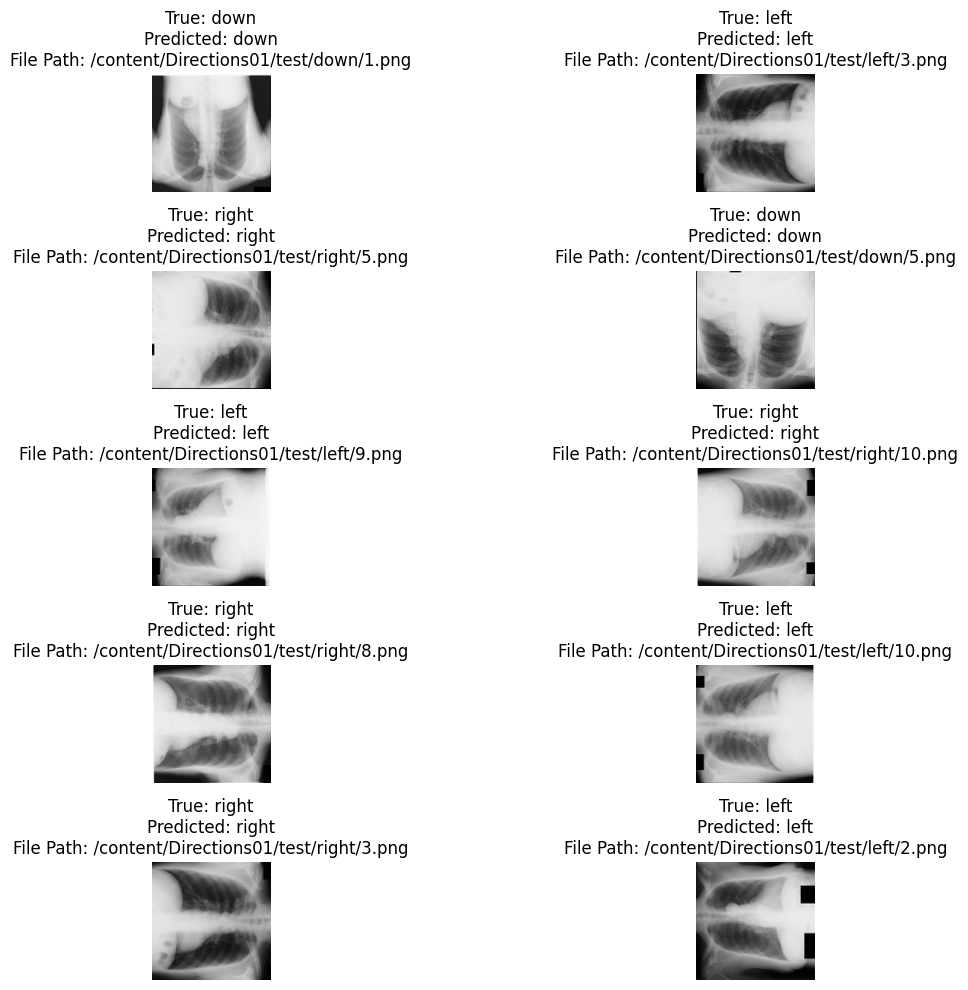

In [ ]:
# Set the model to evaluation mode
model.eval()

# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Make predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Convert the tensors to NumPy arrays
images_np = images.cpu().numpy()
labels_np = labels.cpu().numpy()
predicted_np = predicted.cpu().numpy()

# Define class names (adjust this based on your dataset)
class_names = train_dataset.classes

# Select a random subset of 10 images
random_indices = random.sample(range(len(images)), 10)
file_paths = [test_dataset.imgs[idx][0] for idx in random_indices]

# Reverse the normalization
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
images_np = (images_np * std[:, None, None]) + mean[:, None, None]

# Display images and predictions
plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 2, i + 1)
    plt.imshow(images_np[idx].transpose(1, 2, 0).astype(np.float32))
    true_label = class_names[labels_np[idx]]
    predicted_label = class_names[predicted_np[idx]]
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}\nFile Path: {file_paths[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import torch
import numpy as np

class InfoHolder():

    def __init__(self, heatmap_layer):
        self.gradient = None
        self.activation = None
        self.heatmap_layer = heatmap_layer

    def get_gradient(self, grad):
        self.gradient = grad

    def hook(self, model, input, output):
        output.register_hook(self.get_gradient)
        self.activation = output.detach()

def generate_heatmap(weighted_activation):
    raw_heatmap = torch.mean(weighted_activation, 0)
    heatmap = np.maximum(raw_heatmap.detach().cpu(), 0)
    heatmap /= torch.max(heatmap) + 1e-10
    return heatmap.numpy()

def superimpose(input_img, heatmap):
    img = cv2.cvtColor(input_img,cv2.COLOR_BGR2RGB)
    heatmap = cv2.resize(heatmap, (img.shape[0], img.shape[1]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = np.uint8(heatmap * 0.6 + img * 0.4)
    pil_img = cv2.cvtColor(superimposed_img,cv2.COLOR_BGR2RGB)
    return pil_img

def to_RGB(tensor):
    tensor = (tensor - tensor.min())
    tensor = tensor/(tensor.max() + 1e-10)
    image_binary = np.transpose(tensor.cpu().numpy(), (1, 2, 0))
    image = np.uint8(255 * image_binary)
    return image

def grad_cam(model, input_tensor, heatmap_layer, truelabel=None):
    info = InfoHolder(heatmap_layer)
    heatmap_layer.register_forward_hook(info.hook)

    output = model(input_tensor.unsqueeze(0))[0]
    truelabel = truelabel if truelabel else torch.argmax(output)

    print(output.shape)

    output[truelabel].backward()
    # weights = torch.mean(info.gradient, dim=(2, 3), keepdim=True)
    weights = torch.mean(info.gradient, [0])
    activation = info.activation.squeeze(0)

    weighted_activation = torch.zeros(activation.shape)
    for idx, (weight, activation) in enumerate(zip(weights, activation)):
        weighted_activation[idx] = weight * activation

    heatmap = generate_heatmap(weighted_activation)
    input_image = to_RGB(input_tensor)

    return superimpose(input_image, heatmap)

In [ ]:
heatmap_layer = model.layer3[-1]
image, _ = next(iter(test_loader))

torch.Size([4])


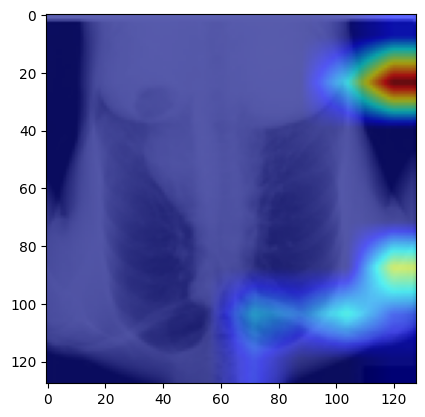

In [ ]:
input_tensor = image[0].to(device)
boxer_label = 1
model.eval()
image = grad_cam(model, input_tensor, heatmap_layer, boxer_label)
plt.imshow(image)
plt.savefig('boxer_grad-cam')